In [9]:
import pandas as pd

df_true = pd.read_csv("True.csv")
df_true["y"] = 1
df_false = pd.read_csv("Fake.csv")
df_false["y"] = 0

print(df_true.shape)
print(df_false.shape)


df_real_fake = pd.concat([df_true, df_false])
df_real_fake.head()

(21417, 5)
(23481, 5)


,title,text,subject,date,y
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [13]:
df_real_fake.value_counts("y")

y
0    23481
1    21417
dtype: int64

In [14]:
label_num = {'politicsNews': 0, 'worldnews': 1, 'News': 2, 'politics': 3, 'left-news': 4, 'Government News': 5, 'US_News': 6, 'Middle-east': 7}

In [15]:
label_num

{'politicsNews': 0,
 'worldnews': 1,
 'News': 2,
 'politics': 3,
 'left-news': 4,
 'Government News': 5,
 'US_News': 6,
 'Middle-east': 7}

In [16]:
df_real_fake['label_num'] = df_real_fake["subject"].map(label_num)

df_real_fake.head()

,title,text,subject,date,y,label_num
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,0


In [17]:
df_shuffled = df_real_fake.sample(frac=1, random_state=1)
df_shuffled.head()

,title,text,subject,date,y,label_num
4528,EPA chief says Paris climate agreement 'bad de...,WASHINGTON (Reuters) - The United States shoul...,politicsNews,"April 2, 2017",1,0
10310,BREAKING NEWS: President Trump Announces Major...,President Trump just tweeted out a new policy ...,politics,"Jul 26, 2017",0,3
10937,Trump says New Hampshire win not necessary to ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"February 7, 2016",1,0
13470,Kremlin: U.S. sanctions aimed at turning busin...,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017",1,1
19397,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,Kellyanne Conway s response to Williams criti...,left-news,"Dec 27, 2016",0,4


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_shuffled['text'], 
    df_shuffled['y'], 
    test_size=0.2, 
    random_state=2022,
    stratify=df_shuffled['y']
    )

In [24]:
print(X_train.shape)
print(X_test.shape)

(35918,)
(8980,)


In [25]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      4696
           1       0.76      0.71      0.73      4284

    accuracy                           0.75      8980
   macro avg       0.75      0.75      0.75      8980
weighted avg       0.75      0.75      0.75      8980



In [26]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine'))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      4696
           1       0.96      0.39      0.55      4284

    accuracy                           0.70      8980
   macro avg       0.80      0.69      0.67      8980
weighted avg       0.79      0.70      0.67      8980



In [27]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4696
           1       0.97      0.98      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [28]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('rf', MultinomialNB(alpha=0.75))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4696
           1       0.97      0.97      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [29]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [30]:
df_shuffled.head()

,title,text,subject,date,y,label_num
4528,EPA chief says Paris climate agreement 'bad de...,WASHINGTON (Reuters) - The United States shoul...,politicsNews,"April 2, 2017",1,0
10310,BREAKING NEWS: President Trump Announces Major...,President Trump just tweeted out a new policy ...,politics,"Jul 26, 2017",0,3
10937,Trump says New Hampshire win not necessary to ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"February 7, 2016",1,0
13470,Kremlin: U.S. sanctions aimed at turning busin...,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017",1,1
19397,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,Kellyanne Conway s response to Williams criti...,left-news,"Dec 27, 2016",0,4


In [31]:
df_shuffled['preprocessed_txt'] = df_shuffled['text'].apply(preprocess)
df_shuffled.head()

,title,text,subject,date,y,label_num,preprocessed_txt
4528,EPA chief says Paris climate agreement 'bad de...,WASHINGTON (Reuters) - The United States shoul...,politicsNews,"April 2, 2017",1,0,WASHINGTON Reuters United States continue enga...
10310,BREAKING NEWS: President Trump Announces Major...,President Trump just tweeted out a new policy ...,politics,"Jul 26, 2017",0,3,President Trump tweet new policy military cons...
10937,Trump says New Hampshire win not necessary to ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"February 7, 2016",1,0,WASHINGTON Reuters U.S. republican presidentia...
13470,Kremlin: U.S. sanctions aimed at turning busin...,MOSCOW (Reuters) - The Kremlin said on Thursda...,worldnews,"November 30, 2017",1,1,MOSCOW Reuters Kremlin say Thursday confident ...
19397,MUST WATCH: Kellyanne Conway PUNCHES BACK Afte...,Kellyanne Conway s response to Williams criti...,left-news,"Dec 27, 2016",0,4,Kellyanne Conway s response Williams critici...


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_shuffled['preprocessed_txt'], 
    df_shuffled['y'], 
    test_size=0.2, 
    random_state=2022,
    stratify=df_shuffled['y']
    )

In [33]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(3,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4696
           1       0.97      0.92      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [34]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('rf', RandomForestClassifier())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4696
           1       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Text(95.72222222222221, 0.5, 'Truth')

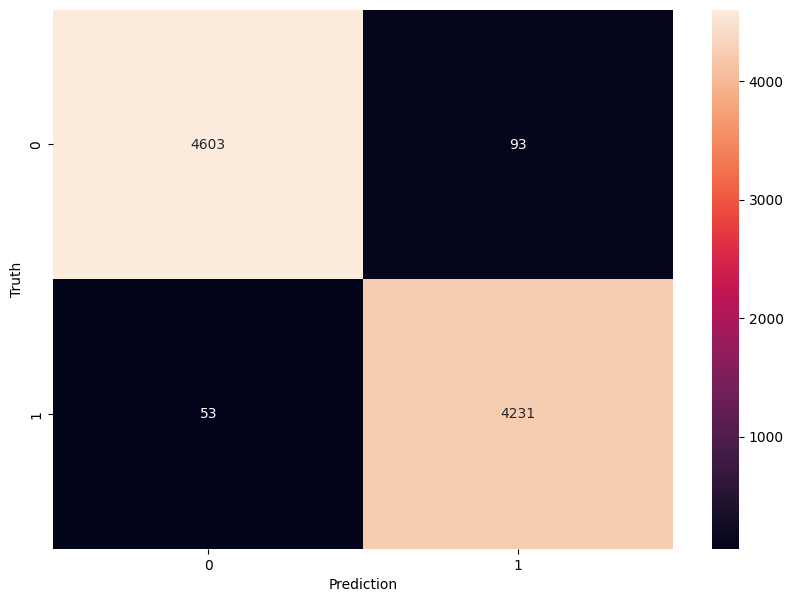

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')